In [7]:
f=open('uniprot-filtered-proteome.fasta')
seq={}
for line in f:
        if line.startswith('>'):
                name=line.replace('>','').split()[0][3:9]
                seq[name]=''
        else:
                seq[name]+=line.replace('\n','').strip()
f.close()


In [8]:
seq

{'O95825': 'MKGLYFQQSSTDEEITFVFQEKEDLPVTEDNFVKLQVKACALSQINTKLLAEMKMKKDLFPVGREIAGIVLDVGSKVSFFQPDDEVVGILPLDSEDPGLCEVVRVHEHYLVHKPEKVTWTEAAGSIRDGVRAYTALHYLSHLSPGKSVLIMDGASAFGTIAIQLAHHRGAKVISTACSLEDKQCLERFRPPIARVIDVSNGKVHVAESCLEETGGLGVDIVLDAGVRLYSKDDEPAVKLQLLPHKHDIITLLGVGGHWVTTEENLQLDPPDSHCLFLKGATLAFLNDEVWNLSNVQQGKYLCILKDVMEKLSTGVFRPQLDEPIPLYEAKVSMEAVQKNQGRKKQVVQF',
 'Q9Y2J0': 'MTDTVFSNSSNRWMYPSDRPLQSNDKEQLQAGWSVHPGGQPDRQRKQEELTDEEKEIINRVIARAEKMEEMEQERIGRLVDRLENMRKNVAGDGVNRCILCGEQLGMLGSACVVCEDCKKNVCTKCGVETNNRLHSVWLCKICIEQREVWKRSGAWFFKGFPKQVLPQPMPIKKTKPQQPVSEPAAPEQPAPEPKHPARAPARGDSEDRRGPGQKTGPDPASAPGRGNYGPPVRRASEARMSSSSRDSESWDHSGGAGDSSRSPAGLRRANSVQASRPAPGSVQSPAPPQPGQPGTPGGSRPGPGPAGRFPDQKPEVAPSDPGTTAPPREERTGGVGGYPAVGAREDRMSHPSGPYSQASAAAPQPAAARQPPPPEEEEEEANSYDSDEATTLGALEFSLLYDQDNSSLQCTIIKAKGLKPMDSNGLADPYVKLHLLPGASKSNKLRTKTLRNTRNPIWNETLVYHGITDEDMQRKTLRISVCDEDKFGHNEFIGETRFSLKKLKPNQRKNFNICLERVIPMKRAGTTGSARGMALYEEEQVERVGDIEERGKILVSLMYSTQQGGLIVGIIRCVHLAAMDANGYSDPFVKLWLKPDMGKKAKHKTQIKKKTLNPEFNEEFFYD

In [11]:
len(seq)

20064

In [9]:
import numpy as np 
import pandas as pd 

data=pd.DataFrame.from_dict(seq,orient='index',columns=['sequence'])
data=data.reset_index().rename(columns={'index':'id'})
data.head()

,id,sequence
0,O95825,MKGLYFQQSSTDEEITFVFQEKEDLPVTEDNFVKLQVKACALSQIN...
1,Q9Y2J0,MTDTVFSNSSNRWMYPSDRPLQSNDKEQLQAGWSVHPGGQPDRQRK...
2,Q13905,MDTDSQRSHLSSFTMKLMDKFHSPKIKRTPSKKGKPAEVSVKIPEK...
3,Q5TD94,MEDSTSPKQEKENQEELGETRRPWEGKTAASPQYSEPESSEPLEAK...
4,Q9HA92,MALPGARARGWAAAARAAQRRRRVENAGGSPSPEPAGRRAALYVHW...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 2 columns):
id          20064 non-null object
sequence    20064 non-null object
dtypes: object(2)
memory usage: 313.6+ KB


In [13]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
data.to_csv('seq_from_uniprot.csv',header=0,index=0)

In [ ]:
#-------------

In [13]:
data=pd.read_csv('seq_from_uniprot.csv',names=['id','seq'])
data.head()

,id,seq
0,O95825,MKGLYFQQSSTDEEITFVFQEKEDLPVTEDNFVKLQVKACALSQIN...
1,Q9Y2J0,MTDTVFSNSSNRWMYPSDRPLQSNDKEQLQAGWSVHPGGQPDRQRK...
2,Q13905,MDTDSQRSHLSSFTMKLMDKFHSPKIKRTPSKKGKPAEVSVKIPEK...
3,Q5TD94,MEDSTSPKQEKENQEELGETRRPWEGKTAASPQYSEPESSEPLEAK...
4,Q9HA92,MALPGARARGWAAAARAAQRRRRVENAGGSPSPEPAGRRAALYVHW...


In [14]:
len(data)

20064

In [15]:
ID_list = data['id'].unique().tolist()

In [16]:
len(ID_list)

20064

In [18]:
drug_list = data['seq'].unique().tolist()

In [19]:
len(drug_list)

20006

In [17]:
print(data[data.isnull().T.any()])

Empty DataFrame
Columns: [id, seq]
Index: []


In [25]:
unique = pd.Series(data['seq'])
unique_dict = dict(zip(data['id'], unique))

In [21]:
data2=pd.read_csv('data_DTC_addsmile.csv')
data2.head()

,Unnamed: 0,compound_id,target_id,standard_type,standard_relation,standard_value,standard_units,smile
0,0,CHEMBL135581,P00374,KD,=,0.5,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
1,1,CHEMBL135581,P00374,KD,=,0.6,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
2,2,CHEMBL135581,P00374,KD,=,450.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
3,3,CHEMBL135581,P00374,KD,=,1000.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
4,4,CHEMBL135581,P00374,KD,=,1200.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21


In [23]:
ID_list2 = data2['target_id'].values.tolist()

In [24]:
len(ID_list2)

71988

In [ ]:
ID_list3 = data2['target_id'].unique().tolist()

In [ ]:
len(ID_list3)

In [22]:
data2['target']=0

In [26]:
data2.head()

,Unnamed: 0,compound_id,target_id,standard_type,standard_relation,standard_value,standard_units,smile,target
0,0,CHEMBL135581,P00374,KD,=,0.5,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,0
1,1,CHEMBL135581,P00374,KD,=,0.6,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,0
2,2,CHEMBL135581,P00374,KD,=,450.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,0
3,3,CHEMBL135581,P00374,KD,=,1000.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,0
4,4,CHEMBL135581,P00374,KD,=,1200.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,0


In [27]:
for i in range(len(ID_list2)):
    if ID_list2[i] in ID_list:
        data2.iloc[[i],[8]] = unique_dict[ID_list2[i]]
    else:
        pass

In [28]:
data2

,Unnamed: 0,compound_id,target_id,standard_type,standard_relation,standard_value,standard_units,smile,target
0,0,CHEMBL135581,P00374,KD,=,0.50,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
1,1,CHEMBL135581,P00374,KD,=,0.60,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
2,2,CHEMBL135581,P00374,KD,=,450.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
3,3,CHEMBL135581,P00374,KD,=,1000.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
4,4,CHEMBL135581,P00374,KD,=,1200.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
5,5,CHEMBL135581,P00374,KD,=,2000.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
6,6,CHEMBL135581,P00374,KD,=,2700.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
7,7,CHEMBL135581,P00374,KD,=,2800.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
8,8,CHEMBL135581,P00374,KD,=,3400.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
9,9,CHEMBL135581,P00374,KD,=,3400.00,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...


In [29]:
data2.drop(data2[data2.target == 0].index, inplace=True)

In [30]:
data2.drop(labels='Unnamed: 0',axis=1, inplace=True)

In [31]:
len(data2)

61479

In [32]:
data2['target'].value_counts()

MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKQGVRGAVSTLLQAPELPTKTRTSRRAAEHRDTTDVPEMPHSKGQGESDPLDHEPAVSPLLPRKERGPPEGGLNEDERLLPKDKKTNLFSALIKKKKKTAPTPPKRSSSFREMDGQPERRGAGEEEGRDISNGALAFTPLDTADPAKSPKPSNGAGVPNGALRESGGSGFRSPHLWKKSSTLTSSRLATGEEEGGGSSSKRFLRSCSASCVPHGAKDTEWRSVTLPRDLQSTGRQFDSSTFGGHKSEKPALPRKRAGENRSDQVTRGTVTPPPRLVKKNEEAADEVFKDIMESSPGSSPPNLTPKPLRRQVTVAPASGLPHKEEAGKGSALGTPAAAEPVTPTSKAGSGAPGGTSKGPAEESRVRRHKHSSESPGRDKGKLSRLKPAPPPPPAASAGKAGGKPSQSPSQEAAGEAVLGAKTKATSLVDAVNSDAAKPSQPGEGLKKPVLPATPKPQSAKPSGTPISPAPVPSTLPSASSALAGDQPSST

In [35]:
data2.head()

,compound_id,target_id,standard_type,standard_relation,standard_value,standard_units,smile,target
0,CHEMBL135581,P00374,KD,=,0.5,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
1,CHEMBL135581,P00374,KD,=,0.6,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
2,CHEMBL135581,P00374,KD,=,450.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
3,CHEMBL135581,P00374,KD,=,1000.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
4,CHEMBL135581,P00374,KD,=,1200.0,NM,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...


In [36]:
data2.to_csv('data_DTC_addsmile_addtarget.csv')

In [ ]:
data3=data2[data2.target.isin(['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA'])]

In [ ]:
data4 = data3[['smile', 'target', 'standard_value']]

In [ ]:
len(data4)

In [ ]:
data4.to_csv('drug_tie2_paris_in_original_DTC.csv')

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

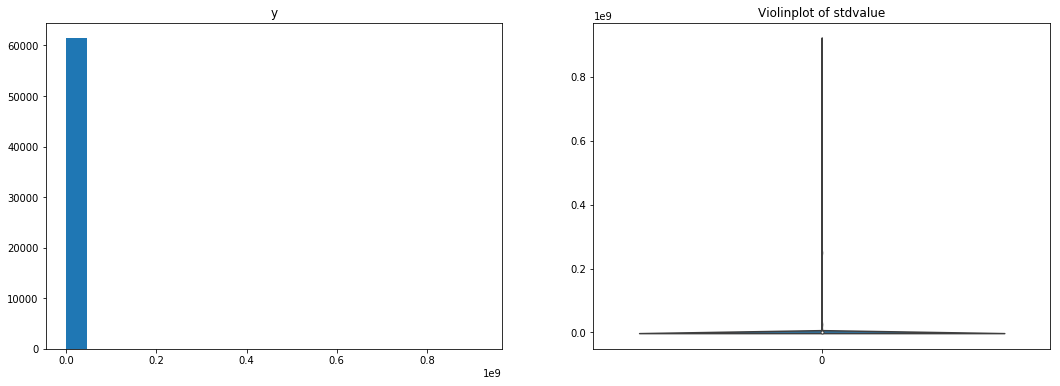

In [39]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(data2['standard_value'], bins=20);
plt.title('y');
plt.subplot(1, 2, 2);
sns.violinplot(data=data2['standard_value']);
plt.title('Violinplot of stdvalue');

In [40]:
data2['standard_value'].value_counts()

10000.00       34703
1000.00          440
1100.00          306
1200.00          300
1300.00          235
2000.00          235
1400.00          233
1500.00          212
1800.00          208
1900.00          191
1600.00          190
100.00           181
1700.00          180
200.00           180
10.00            166
2300.00          164
120.00           163
2100.00          159
110.00           154
140.00           148
130.00           145
2600.00          144
2500.00          139
2400.00          138
3100.00          138
2200.00          134
2900.00          131
150.00           129
170.00           127
190.00           125
               ...  
851138.04          1
11600.00           1
109500.00          1
1839.00            1
24.80              1
559.00             1
562.34             1
1090.00            1
2.65               1
3090.30            1
401.00             1
17400000.00        1
53.30              1
8550.00            1
1590.00            1
74.40              1
76600.00     

In [ ]:
#--
#binary

In [43]:
smiles = np.array(data2['smile'].values.tolist())
targets = np.array(data2['target'].values.tolist())

In [44]:
y = [1 if i else 0 for i in data2.standard_value.values < 10]
y = np.array(y)

In [48]:
np.save('DTC_smiles_binary.npy', smiles)
np.save('DTC_targets_binary.npy', targets)
np.save('DTC_y_binary.npy', y)

In [ ]:
#--
#regress

In [ ]:
def convert_y_unit(y, from_, to_):
    # basis as nM

    if from_ == 'nM':
        y = y
    elif from_ == 'p':
        y = 10**(-y) / 1e-9

    if to_ == 'p':
        y = -np.log10(y*1e-9 + 1e-10)
    elif to_ == 'nM':
        y = y

    return y

In [ ]:
y = convert_y_unit(data.standard_value.values, 'nM', 'p')

y = np.array(y)

In [ ]:
smiles = np.array(data['smile'].values.tolist())
targets = np.array(data['target'].values.tolist())

In [ ]:
np.save('DTC_smiles_reg.npy', smiles)
np.save('DTC_targets_reg.npy', targets)
np.save('DTC_y_reg.npy', y)